# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline


from datetime import date,datetime
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


# Reading training data

In [4]:
train_data=pd.read_csv('train.csv')

# Reading test data

In [5]:
test_data=pd.read_csv('test.csv')

# First five columns of train data

In [6]:
train_data.head()

,id,date_of_birth,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target
0,1,1993-03-14,1,0.036495,0.208897,2400,6,2,0,0,570,817,0
1,2,1966-09-27,1,0.023423,0.260438,2200,6,1,0,0,741,756,0
2,3,1931-01-11,2,0.027205,0.335922,3000,6,1,0,1,805,779,0
3,4,1953-01-07,1,0.009141,0.353779,2100,2,4,0,0,573,829,0
4,5,1943-11-17,0,0.068424,0.314966,2500,2,3,0,0,833,629,0


In [7]:
train_data.shape

(20839, 13)

# Column names of train data

In [8]:
train_data.columns

Index(['id', 'date_of_birth', 'number_dependants', 'credit_utilization',
       'debt_to_income_ratio', 'monthly_income', 'number_open_credit_lines',
       'number_open_loans', 'number_90_days_past_due', 'number_charged_off',
       'score1', 'score2', 'target'],
      dtype='object')

# Count of levels of target variable in train data

In [9]:
train_data['target'].value_counts()

0    18710
1     2129
Name: target, dtype: int64

# Details of columns in train data

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20839 entries, 0 to 20838
Data columns (total 13 columns):
id                          20839 non-null int64
date_of_birth               20839 non-null object
number_dependants           20839 non-null int64
credit_utilization          20839 non-null float64
debt_to_income_ratio        20839 non-null float64
monthly_income              20839 non-null int64
number_open_credit_lines    20839 non-null int64
number_open_loans           20839 non-null int64
number_90_days_past_due     20839 non-null int64
number_charged_off          20839 non-null int64
score1                      20839 non-null int64
score2                      20839 non-null int64
target                      20839 non-null int64
dtypes: float64(2), int64(10), object(1)
memory usage: 2.1+ MB


# Creation of Age feature by using date_of_birth variable in both train and test datasets

In [11]:
train_data['date_of_birth']=[datetime.strptime(x, '%Y-%m-%d').date() for x in train_data['date_of_birth']]

In [12]:
test_data['date_of_birth']=[datetime.strptime(x, '%Y-%m-%d').date() for x in test_data['date_of_birth']]

In [13]:
train_data['Age']=(date.today()-train_data['date_of_birth']).dt.days


In [14]:
test_data['Age']=(date.today()-test_data['date_of_birth']).dt.days

# Dropping of irrelavant variables

In [15]:
train_data=train_data.drop(['id','date_of_birth'],axis=1)

In [16]:
test_data=test_data.drop(['id','date_of_birth'],axis=1)

# Statistics of Train data

In [17]:
train_data.describe()

,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,Age
count,20839.000000,2.083900e+04,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000,20839.000000,20839.00000,20839.000000,20839.000000
mean,0.483421,4.815929e-02,0.333507,2290.772110,4.997745,2.027497,0.098901,0.098901,669.511637,669.29440,0.102164,20157.428379
std,0.719653,4.571744e-02,0.117332,320.090288,2.248021,1.431671,0.314963,0.315420,98.005767,98.60763,0.302871,7514.800425
min,-1.000000,3.932283e-07,0.029386,2000.000000,0.000000,0.000000,0.000000,0.000000,500.000000,500.00000,0.000000,7317.000000
25%,0.000000,1.436676e-02,0.247782,2100.000000,3.000000,1.000000,0.000000,0.000000,584.000000,583.00000,0.000000,13624.500000
50%,0.000000,3.478343e-02,0.325432,2200.000000,5.000000,2.000000,0.000000,0.000000,669.000000,670.00000,0.000000,20119.000000
75%,1.000000,6.789546e-02,0.411210,2400.000000,6.000000,3.000000,0.000000,0.000000,755.000000,754.00000,0.000000,26627.000000
max,6.000000,5.387018e-01,0.801838,5000.000000,15.000000,9.000000,3.000000,3.000000,839.000000,839.00000,1.000000,69396.000000


# Number of missing values in train and test data

In [18]:
train_data.isnull().sum().max()

0

In [19]:
test_data.isnull().sum().max()

0

# Histograms of all numerical variables

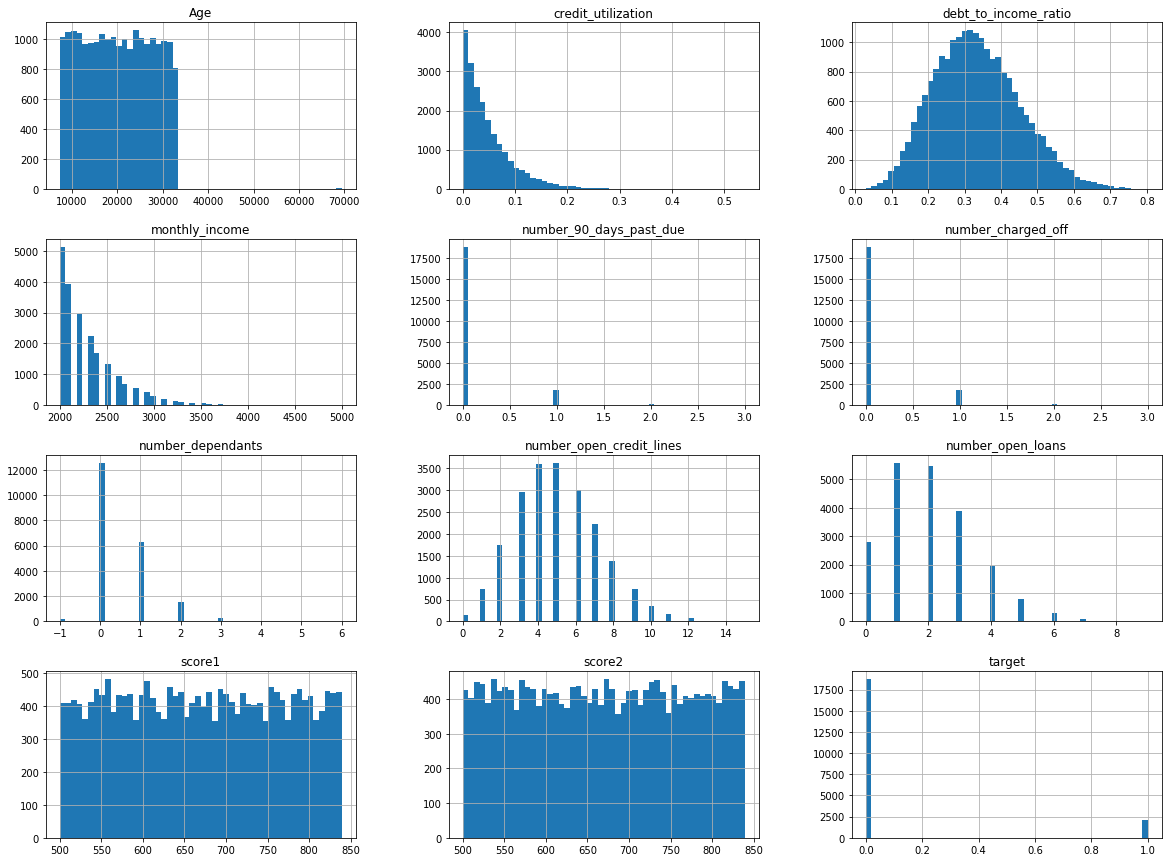

In [20]:

train_data.hist(bins=50,figsize=(20,15))
plt.show()

# Capping the negative number of dependents to 0

In [21]:
train_data['number_dependants']=np.where(train_data['number_dependants']>0,train_data['number_dependants'],0)

In [22]:
train_data.head()

,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,Age
0,1,0.036495,0.208897,2400,6,2,0,0,570,817,0,9577
1,1,0.023423,0.260438,2200,6,1,0,0,741,756,0,19242
2,2,0.027205,0.335922,3000,6,1,0,1,805,779,0,32285
3,1,0.009141,0.353779,2100,2,4,0,0,573,829,0,24253
4,0,0.068424,0.314966,2500,2,3,0,0,833,629,0,27592


# Standardizing the income , age and fico score variables

In [23]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

train_data['monthly_income'] = rob_scaler.fit_transform(train_data['monthly_income'].values.reshape(-1,1))
train_data['Age'] = rob_scaler.fit_transform(train_data['Age'].values.reshape(-1,1))
train_data['score1'] = rob_scaler.fit_transform(train_data['score1'].values.reshape(-1,1))
train_data['score2'] = rob_scaler.fit_transform(train_data['score2'].values.reshape(-1,1))



In [24]:
train_data.head()

,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,Age
0,1,0.036495,0.208897,0.666667,6,2,0,0,-0.578947,0.859649,0,-0.810767
1,1,0.023423,0.260438,0.000000,6,1,0,0,0.421053,0.502924,0,-0.067449
2,2,0.027205,0.335922,2.666667,6,1,0,1,0.795322,0.637427,0,0.935666
3,1,0.009141,0.353779,-0.333333,2,4,0,0,-0.561404,0.929825,0,0.317939
4,0,0.068424,0.314966,1.000000,2,3,0,0,0.959064,-0.239766,0,0.574736


# Undersampling the non default loans in traing data as there are very low default loans in train data

In [25]:
train_data = train_data.sample(frac=1)

# amount of default loans 2129 rows.
fraud_df = train_data.loc[train_data['target'] == 1]
non_fraud_df = train_data.loc[train_data['target'] == 0][:2129]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,number_dependants,credit_utilization,debt_to_income_ratio,monthly_income,number_open_credit_lines,number_open_loans,number_90_days_past_due,number_charged_off,score1,score2,target,Age
20644,0,0.090345,0.212433,-0.666667,2,7,0,0,-0.695906,0.736842,1,1.004961
16597,0,0.008305,0.363989,0.000000,6,2,0,1,-0.590643,-0.783626,1,0.458912
16402,0,0.019046,0.227894,1.666667,5,3,0,0,-0.058480,-0.263158,0,-0.924822
17486,1,0.119063,0.097043,0.666667,4,1,0,0,-0.187135,-0.964912,0,-0.635570
2809,0,0.069312,0.380743,-0.666667,5,1,0,0,0.228070,-0.578947,1,-0.187272


# Shape of new dataset

In [26]:
new_df.shape

(4258, 12)

# Heat Map of correlations in original as well as new data

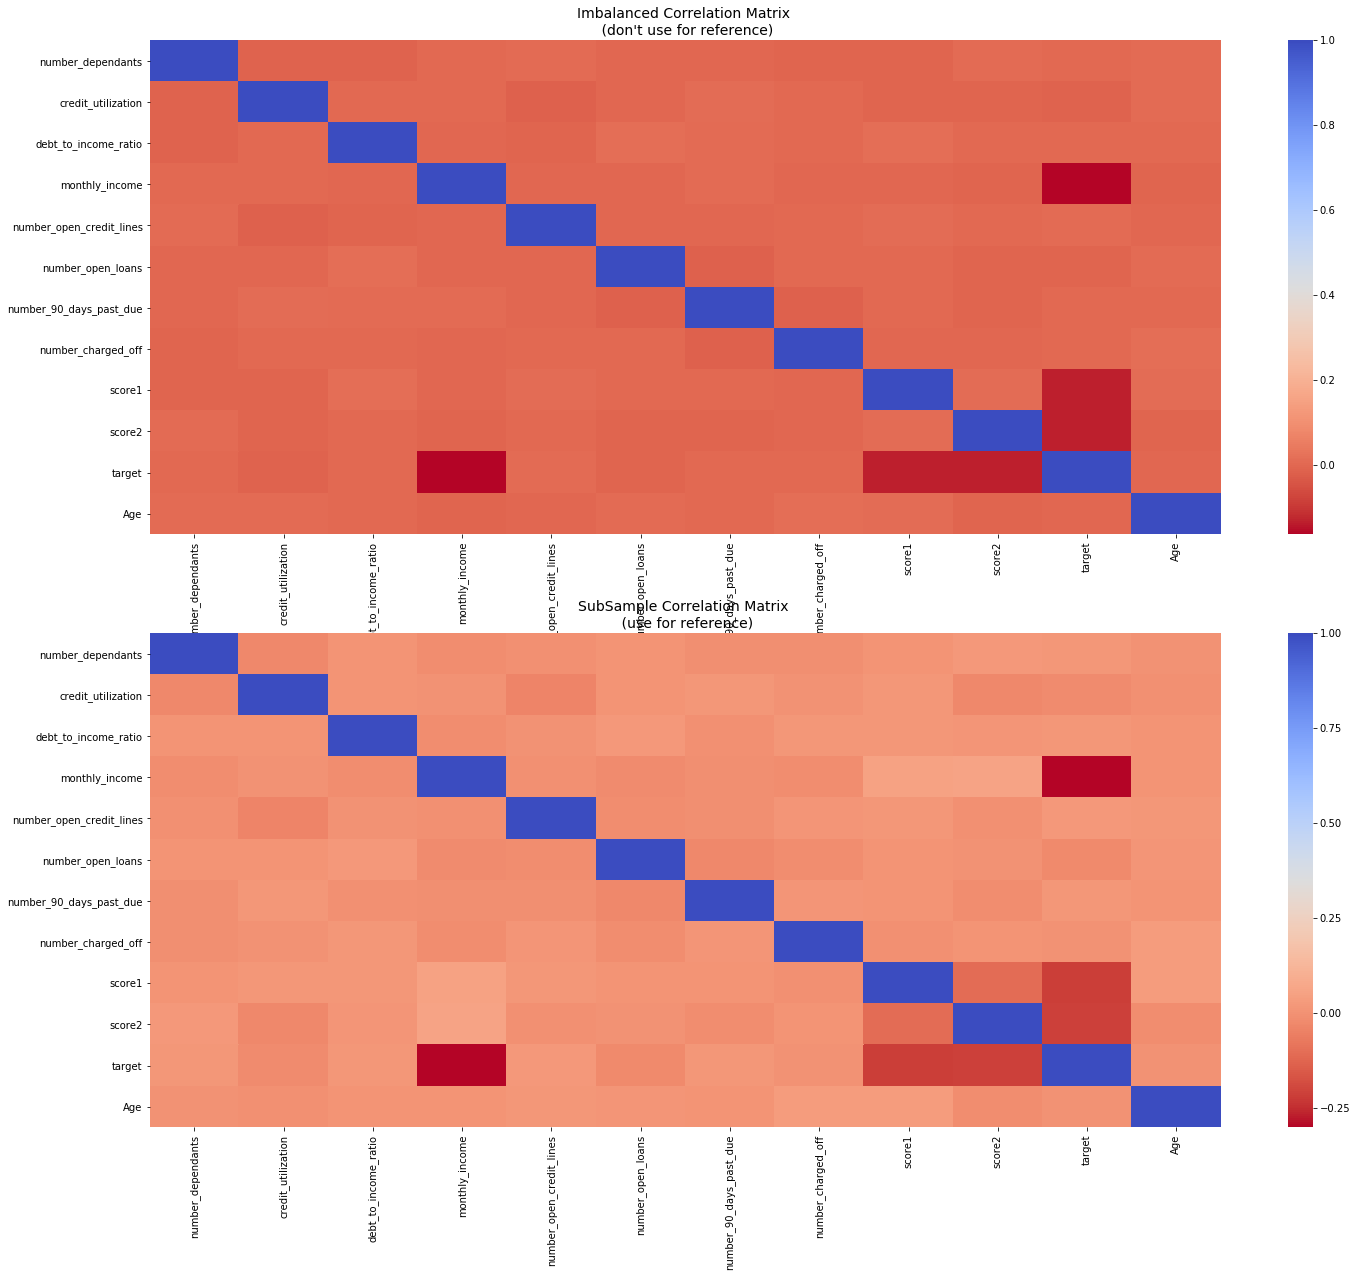

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = train_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

# Box plots of highly negatively correlated variables with target variable

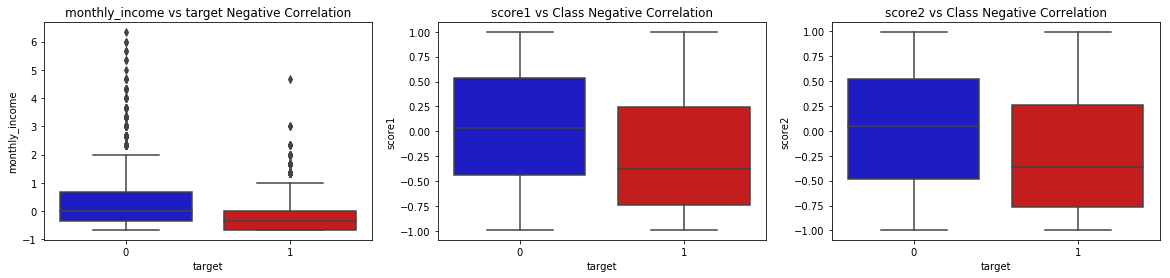

In [28]:
colors = ["#0101DF", "#DF0101"]
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="target", y="monthly_income", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('monthly_income vs target Negative Correlation')

sns.boxplot(x="target", y="score1", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('score1 vs Class Negative Correlation')


sns.boxplot(x="target", y="score2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('score2 vs Class Negative Correlation')




plt.show()

# Normal distribution plots highly negatively correlated variables with target variable

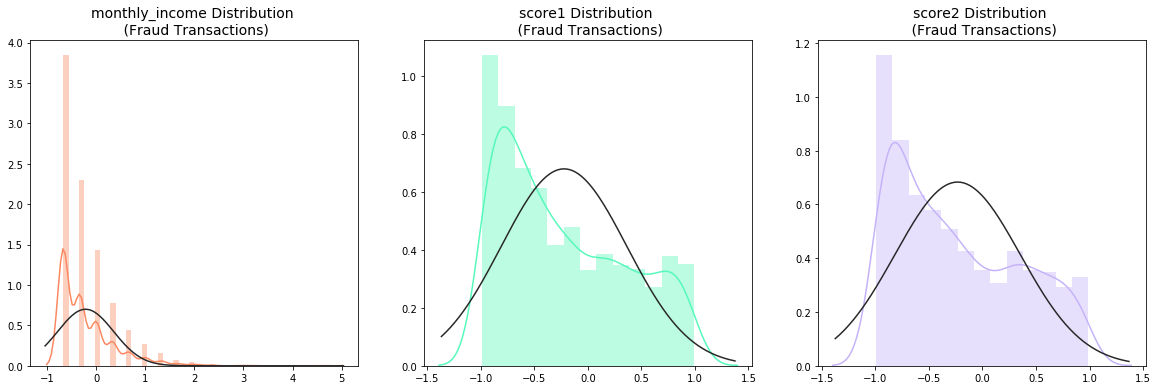

In [29]:


f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

monthly_income_fraud_dist = new_df['monthly_income'].loc[new_df['target'] == 1].values
sns.distplot(monthly_income_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('monthly_income Distribution \n (Fraud Transactions)', fontsize=14)

score1_fraud_dist = new_df['score1'].loc[new_df['target'] == 1].values
sns.distplot(score1_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('score1 Distribution \n (Fraud Transactions)', fontsize=14)


score2_fraud_dist = new_df['score2'].loc[new_df['target'] == 1].values
sns.distplot(score2_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('score2 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

# Removing outliers from variables that have high negative correlation with target variable

In [30]:
# # -----> monthly_income Removing Outliers (Highest Negative Correlated with Labels)
monthly_income_fraud = new_df['monthly_income'].loc[new_df['target'] == 1].values
q25, q75 = np.percentile(monthly_income_fraud, 25), np.percentile(monthly_income_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
monthly_income_iqr = q75 - q25
print('iqr: {}'.format(monthly_income_iqr))

monthly_income_cut_off = monthly_income_iqr * 1.5
monthly_income_lower, monthly_income_upper = q25 - monthly_income_cut_off, q75 + monthly_income_cut_off
print('Cut Off: {}'.format(monthly_income_cut_off))
print('monthly_income Lower: {}'.format(monthly_income_lower))
print('monthly_income Upper: {}'.format(monthly_income_upper))

outliers = [x for x in monthly_income_fraud if x < monthly_income_lower or x > monthly_income_upper]
print('Feature monthly_income Outliers for Fraud Cases: {}'.format(len(outliers)))
print('monthly_income outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['monthly_income'] > monthly_income_upper) | (new_df['monthly_income'] < monthly_income_lower)].index)
print('----' * 44)

# -----> score1 removing outliers from fraud transactions
score1_fraud = new_df['score1'].loc[new_df['target'] == 1].values
q25, q75 = np.percentile(score1_fraud, 25), np.percentile(score1_fraud, 75)
score1_iqr = q75 - q25

score1_cut_off = score1_iqr * 1.5
score1_lower, score1_upper = q25 - score1_cut_off, q75 + score1_cut_off
print('score1 Lower: {}'.format(score1_lower))
print('score1 Upper: {}'.format(score1_upper))
outliers = [x for x in score1_fraud if x < score1_lower or x > score1_upper]
print('score1 outliers: {}'.format(outliers))
print('Feature score1 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['score1'] > score1_upper) | (new_df['score1'] < score1_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers score2 Feature
score2_fraud = new_df['score2'].loc[new_df['target'] == 1].values
q25, q75 = np.percentile(score2_fraud, 25), np.percentile(score2_fraud, 75)
score2_iqr = q75 - q25

score2_cut_off = score2_iqr * 1.5
score2_lower, score2_upper = q25 - score2_cut_off, q75 + score2_cut_off
print('score2 Lower: {}'.format(score2_lower))
print('score2 Upper: {}'.format(score2_upper))
outliers = [x for x in score2_fraud if x < score2_lower or x > score2_upper]
print('score2 outliers: {}'.format(outliers))
print('Feature score2 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['score2'] > score2_upper) | (new_df['score2'] < score2_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -0.6666666666666666 | Quartile 75: 0.0
iqr: 0.6666666666666666
Cut Off: 1.0
monthly_income Lower: -1.6666666666666665
monthly_income Upper: 1.0
Feature monthly_income Outliers for Fraud Cases: 70
monthly_income outliers:[1.6666666666666667, 1.6666666666666667, 1.3333333333333333, 2.0, 1.6666666666666667, 1.6666666666666667, 2.0, 1.3333333333333333, 1.6666666666666667, 1.3333333333333333, 1.3333333333333333, 2.3333333333333335, 2.0, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.6666666666666667, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.6666666666666667, 1.6666666666666667, 1.3333333333333333, 1.6666666666666667, 1.3333333333333333, 3.0, 1.3333333333333333, 1.3333333333333333, 1.6666666666666667, 2.0, 4.666666666666667, 1.6666666666666667, 1.3333333333333333, 2.0, 1.3333333333333333, 1.6666666666666667, 1.3333333333333333, 2.0, 2.3333333333333335, 1.3333333333333333, 2.0, 1.3333333333333333, 1.33333

# Creating separate dataframes for predictors and dependent variable

In [31]:

X = new_df.drop('target', axis=1)
y = new_df['target']

# The following machine learning classifiers are used for the analysis
1)logisitc Regression
2)K-Nearest Neighbor
3)Support Vector classifier
4)Gradient Boosting Classifier
5)Random Forest Classifier

In [32]:


classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=42),
    "RandomForestClassifier":RandomForestClassifier()
    
    
}

# Training accuracy score for all classifiers

In [33]:

for key, classifier in classifiers.items():
    classifier.fit(X, y)
    training_score = cross_val_score(classifier, X, y, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

C:\Users\manid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Classifiers:  LogisticRegression Has a training score of 66.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 61.0 % accuracy score


C:\Users\manid\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Classifiers:  SVC Has a training score of 67.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 59.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 67.0 % accuracy score


C:\Users\manid\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classifiers:  RandomForestClassifier Has a training score of 63.0 % accuracy score


# Roc_auc scores for all classifiers

In [34]:
    

# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(LogisticRegression(), X, y, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(KNeighborsClassifier(), X, y, cv=5)

svc_pred = cross_val_predict(SVC(), X, y, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(DecisionTreeClassifier(), X, y, cv=5)

gbr_pred = cross_val_predict(GradientBoostingClassifier(random_state=42), X, y, cv=5)

rf_pred = cross_val_predict(RandomForestClassifier(), X, y, cv=5)

C:\Users\manid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [35]:


print('Logistic Regression: ', roc_auc_score(y, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y, tree_pred))
print('Gradient Boosting Classifier: ', roc_auc_score(y, gbr_pred))
print('Random Forest Classifier: ', roc_auc_score(y, rf_pred))

Logistic Regression:  0.7107434141113027
KNears Neighbors:  0.602727861421402
Support Vector Classifier:  0.7263709087661123
Decision Tree Classifier:  0.5942488262910798
Gradient Boosting Classifier:  0.6638821434353246
Random Forest Classifier:  0.6275821596244132


# Plotting  ROC Curves

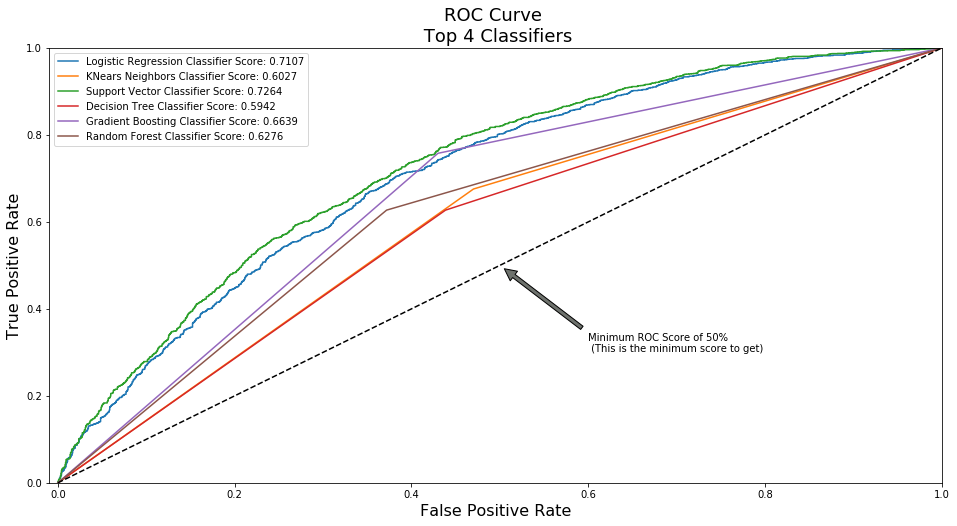

In [36]:

log_fpr, log_tpr, log_thresold = roc_curve(y, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y, tree_pred)
gbr_fpr, gbr_tpr, svc_threshold = roc_curve(y, gbr_pred)
rf_fpr, rf_tpr, tree_threshold = roc_curve(y, rf_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,gbr_fpr, gbr_tpr,rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y, tree_pred)))
    plt.plot(gbr_fpr, gbr_tpr, label='Gradient Boosting Classifier Score: {:.4f}'.format(roc_auc_score(y, gbr_pred)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y, rf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr,gbr_fpr, gbr_tpr,rf_fpr, rf_tpr)
plt.show()

# Confusion Matrix for Gradient boosting model

In [37]:
confusion_matrix(y,gbr_pred)

array([[ 992,  748],
       [ 499, 1560]], dtype=int64)

# Features improtances using Random forest classifier 

In [38]:
# Get numerical feature importances
importances = list(RandomForestClassifier().fit(X,y).feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: score1               Importance: 0.19
Variable: score2               Importance: 0.18
Variable: credit_utilization   Importance: 0.13
Variable: debt_to_income_ratio Importance: 0.13
Variable: Age                  Importance: 0.13
Variable: number_open_credit_lines Importance: 0.08
Variable: monthly_income       Importance: 0.06
Variable: number_open_loans    Importance: 0.05
Variable: number_dependants    Importance: 0.03
Variable: number_90_days_past_due Importance: 0.01
Variable: number_charged_off   Importance: 0.01


C:\Users\manid\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Features importances plot 

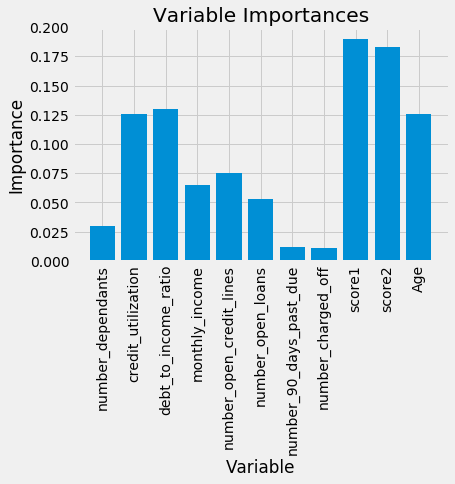

In [39]:

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#  Predictions on test data set

In [41]:
pd.DataFrame(GradientBoostingClassifier().fit(X,y).predict(test_data))[0].value_counts()

0    794
1    206
Name: 0, dtype: int64